# Bhupender Sejwal, 9044574

# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [14]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

2. Observe the first few rows of the dataset.

***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

5. Now let's inspect the ***Week*** column in the dataframe.

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

7. Let's only keep necessary columns

8. How to rename your columns?

Display the dataframe

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [15]:
# Load Cars Dataset
df_cars = pd.read_csv("cars.csv", delimiter=";")


# Remove first row if it's metadata
df_cars = df_cars.iloc[1:, :]

# Check missing values
print(df_cars.isnull().sum())

# Compute percentage of missing data
missing_percentage = (df_cars.isnull().sum() / len(df_cars)) * 100
print(missing_percentage)


Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64
Car             0.000000
MPG             0.738916
Cylinders       0.000000
Displacement    0.246305
Horsepower      0.492611
Weight          0.246305
Acceleration    0.000000
Model           0.000000
Origin          0.000000
dtype: float64


First Row seems to be the datatype, we need to remove it

Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

Lets also check dropping the columns

Let's observe how many columns we lost

### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [16]:
# Convert MPG column to numeric
df_cars["MPG"] = pd.to_numeric(df_cars["MPG"], errors='coerce')

# Impute missing values using the mean
imputer = SimpleImputer(strategy="mean")
df_cars["MPG"] = imputer.fit_transform(df_cars[["MPG"]])

print(df_cars.head())


                         Car        MPG Cylinders Displacement Horsepower  \
1  Chevrolet Chevelle Malibu  23.096278         8        307.0      130.0   
2          Buick Skylark 320  15.000000         8        350.0        NaN   
3         Plymouth Satellite  23.096278         8        318.0      150.0   
4              AMC Rebel SST  16.000000         8          NaN      150.0   
5                Ford Torino  17.000000         8        302.0      140.0   

  Weight Acceleration Model Origin  
1  3504.         12.0    70     US  
2  3693.         11.5    70     US  
3  3436.         11.0    70     US  
4    NaN         12.0    70     US  
5  3449.         10.5    70     US  


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [18]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

print(df_diabetes.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

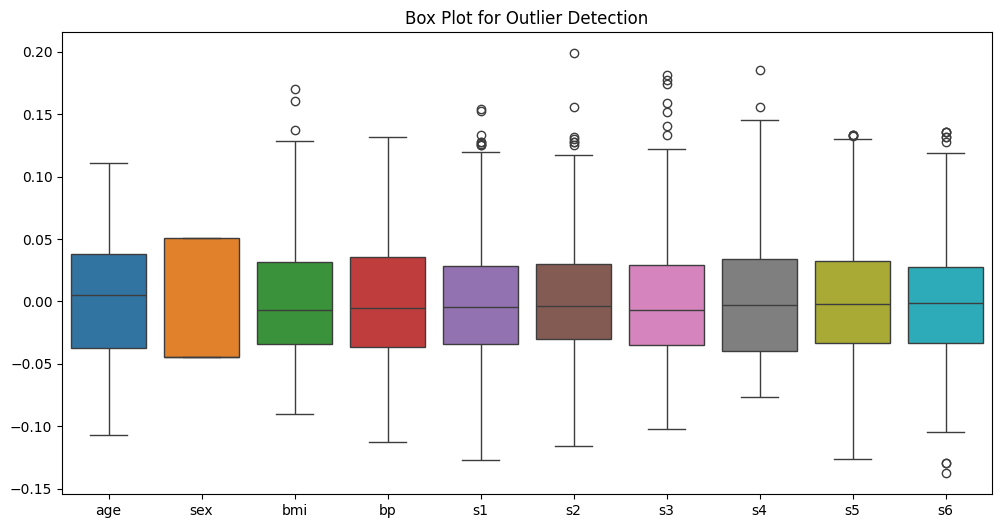

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_diabetes)
plt.title("Box Plot for Outlier Detection")
plt.show()


#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

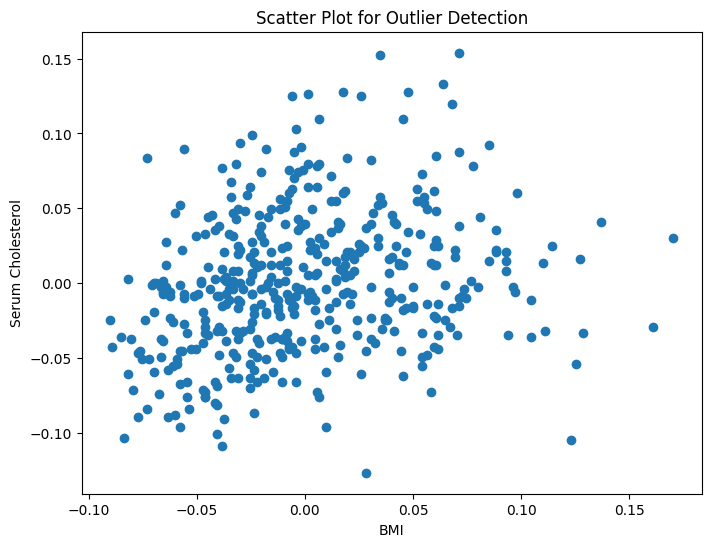

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(df_diabetes["bmi"], df_diabetes["s1"])
plt.xlabel("BMI")
plt.ylabel("Serum Cholesterol")
plt.title("Scatter Plot for Outlier Detection")
plt.show()


#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [44]:
z_scores = np.abs(stats.zscore(df_diabetes))

# Set threshold for identifying outliers
threshold = 3

# Filter the data: keep only rows where all Z-scores are below the threshold
df_no_outliers = df_diabetes[(z_scores < threshold).all(axis=1)]

# Output results
print("Original shape:", df_diabetes.shape)
print("Shape after removing outliers using Z-score:", df_no_outliers.shape)

Original shape: (442, 10)
Shape after removing outliers using Z-score: (430, 10)


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [48]:
# Compute Z-scores
z_scores = np.abs(stats.zscore(df_diabetes))

# Boolean mask for rows with any Z-score > 2
outliers_mask = (z_scores > 2).any(axis=1)

# Filter rows that are outliers
df_outliers = df_diabetes[outliers_mask]

# Print number of outliers and show the first few
print("Number of outlier rows (Z > 2):", df_outliers.shape[0])
print(df_outliers.head())

Number of outlier rows (Z > 2): 129
         age       sex       bmi        bp        s1        s2        s3  \
5  -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
7   0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
10 -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
11  0.027178  0.050680  0.017506 -0.033213 -0.007073  0.045972 -0.065491   
15 -0.052738  0.050680 -0.018062  0.080401  0.089244  0.107662 -0.039719   

          s4        s5        s6  
5  -0.076395 -0.041176 -0.096346  
7   0.017703 -0.035816  0.003064  
10 -0.076395 -0.062917 -0.034215  
11  0.071210 -0.096435 -0.059067  
15  0.108111  0.036060 -0.042499  


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [ ]:
# Calculate the Inter-Quartile Range (IQR) for each column in df_diabetes
Q1 = df_diabetes.quantile(0.25)
Q3 = df_diabetes.quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25th percentile):\n", Q1)
print("\nQ3 (75th percentile):\n", Q3)
print("\nIQR (Q3 - Q1):\n", IQR)


Q1 (25th percentile):
 age   -0.037299
sex   -0.044642
bmi   -0.034229
bp    -0.036656
s1    -0.034248
s2    -0.030358
s3    -0.035117
s4    -0.039493
s5    -0.033246
s6    -0.033179
Name: 0.25, dtype: float64

Q3 (75th percentile):
 age    0.038076
sex    0.050680
bmi    0.031248
bp     0.035644
s1     0.028358
s2     0.029844
s3     0.029312
s4     0.034309
s5     0.032432
s6     0.027917
Name: 0.75, dtype: float64

IQR (Q3 - Q1):
 age    0.075375
sex    0.095322
bmi    0.065477
bp     0.072300
s1     0.062606
s2     0.060203
s3     0.064429
s4     0.073802
s5     0.065678
s6     0.061096
dtype: float64


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [50]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print bounds for inspection
print("Lower Bound:\n", lower_bound)
print("\nUpper Bound:\n", upper_bound)

Lower Bound:
 age   -0.150362
sex   -0.187624
bmi   -0.132445
bp    -0.145106
s1    -0.128157
s2    -0.120663
s3    -0.131760
s4    -0.150197
s5    -0.131762
s6    -0.124823
dtype: float64

Upper Bound:
 age    0.151139
sex    0.193663
bmi    0.129464
bp     0.144094
s1     0.122267
s2     0.120149
s3     0.125954
s4     0.145012
s5     0.130949
s6     0.119561
dtype: float64


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [52]:
# Boolean mask for non-outliers
non_outliers_mask = ~((df_diabetes < lower_bound) | (df_diabetes > upper_bound)).any(axis=1)

# Remove outliers
df_cleaned = df_diabetes[non_outliers_mask]

# Print shapes for comparison
print("Original shape:", df_diabetes.shape)
print("Shape after removing outliers:", df_cleaned.shape)

Original shape: (442, 10)
Shape after removing outliers: (411, 10)


# Summary

In this lab, we explored outlier detection using three main techniques: Z-Score, IQR (Interquartile Range), and visual methods like boxplots. Z-Score detects values far from the mean, commonly flagging those above 2 or 3 standard deviations. IQR identifies outliers by calculating the range between the 25th and 75th percentiles and removing data points outside 1.5 times the IQR. We implemented each method using pandas and scipy, defined thresholds, and removed outlier rows accordingly. These techniques are essential in data cleaning to ensure more accurate analysis, as outliers can skew results and lead to misleading insights during data modeling.